In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
df = pd.read_csv("Amazon_Unlocked_Mobile.csv")
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


In [4]:
# Check for missing data
print(df.isnull().sum()) # View the count of missing values in each column

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64


In [ ]:
# Assuming you have a DataFrame named 'df'
# Use isnull() to check for null values in the DataFrame
null_values = df.isnull()

# Use sum() to calculate the count of null values in each column
null_count = null_values.sum()

# Print the count of null values in each column
print(null_count)

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64


In [7]:
# Remove null values
df.dropna(inplace=True)
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


In [6]:
df.head() # View the first few rows

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
# Convert text to lowercase
df['Cleaned_Reviews'] = df['Reviews'].str.lower()

# Remove punctuation and numbers
df['Cleaned_Reviews'] = df['Cleaned_Reviews'].str.replace('[^\w\s]', '')
df['Cleaned_Reviews'] = df['Cleaned_Reviews'].str.replace('\d+', '')

# Tokenize the reviews
df['Tokenized_Reviews'] = df['Cleaned_Reviews'].apply(word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
df['Tokenized_Reviews'] = df['Tokenized_Reviews'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-14-26247ea16b79>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cleaned_Reviews'] = df['Cleaned_Reviews'].str.replace('[^\w\s]', '')
<ipython-input-14-26247ea16b79>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cleaned_Reviews'] = df['Cleaned_Reviews'].str.replace('\d+', '')


In [15]:
from nltk.probability import FreqDist
# Concatenate all tokenized reviews into a single list
all_reviews = [word for review in df['Tokenized_Reviews'] for word in review]

# Calculate word frequencies
word_freq = FreqDist(all_reviews)

# Display the most common words
print(word_freq.most_common(10))

[('phone', 356457), ('great', 83198), ('good', 80724), ('one', 52868), ('like', 49625), ('screen', 46909), ('use', 45794), ('battery', 44331), ('works', 40573), ('would', 39297)]


In [ ]:
# Calculate word frequencies
word_freq = FreqDist(all_reviews)

# Display the most common words
print(word_freq.most_common(10))

[('phone', 356457), ('great', 83198), ('good', 80724), ('one', 52868), ('like', 49625), ('screen', 46909), ('use', 45794), ('battery', 44331), ('works', 40573), ('would', 39297)]


In [ ]:
# Retrieve the top 10 most frequent words
top_10_words = word_freq.most_common(10)

# Display the top 10 words and their frequencies
for word, frequency in top_10_words:
    print(f"{word}: {frequency}")

phone: 356457
great: 83198
good: 80724
one: 52868
like: 49625
screen: 46909
use: 45794
battery: 44331
works: 40573
would: 39297


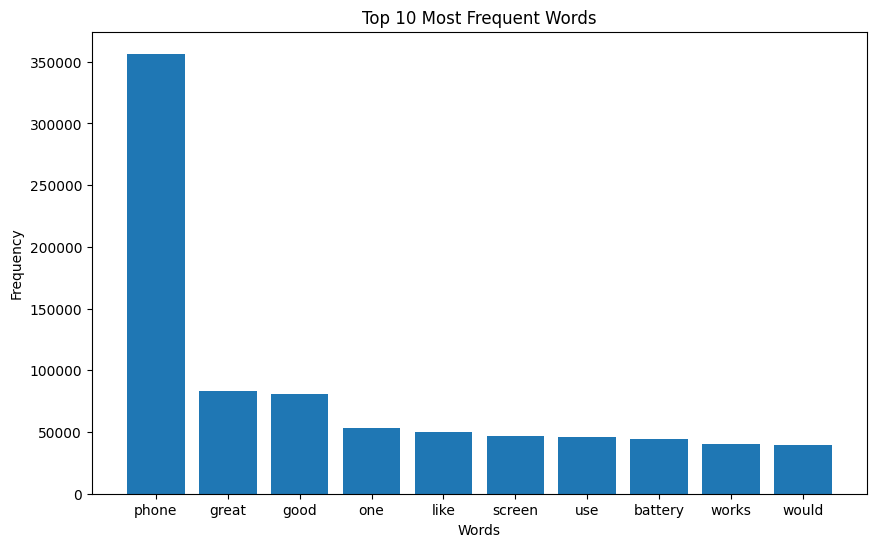

In [ ]:
import matplotlib.pyplot as plt

# Create lists for words and frequencies
words = [word[0] for word in top_10_words]
frequencies = [word[1] for word in top_10_words]

# Plot the word frequencies
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each review
df['Sentiment'] = df['Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


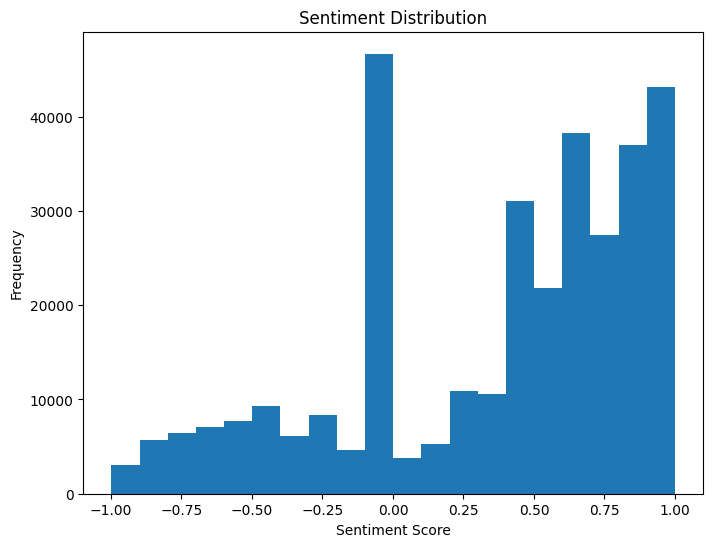

In [ ]:
# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
df['Sentiment'].plot(kind='hist', bins=20)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

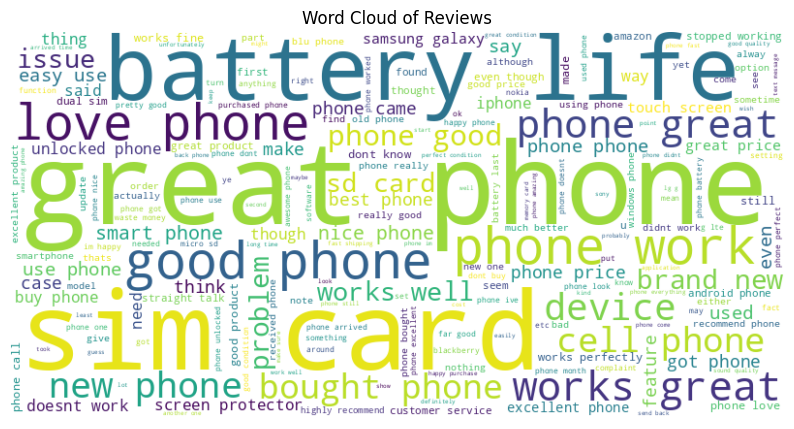

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all tokenized reviews into a single string
all_reviews = ' '.join([word for review in df['Tokenized_Reviews'] for word in review])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

Product Name

In [ ]:
# Preprocess the text data
df.dropna(subset=['Product Name'], inplace=True)
# Convert text to lowercase
df['Product Name'] = df['Product Name'].str.lower()

# Remove punctuation and numbers
df['Cleaned_Name'] = df['Cleaned_Name'].str.replace('[^\w\s]', '')
df['Cleaned_Name'] = df['Cleaned_Name'].str.replace('\d+', '')

<ipython-input-39-378ddfac7f0c>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cleaned_Name'] = df['Cleaned_Name'].str.replace('[^\w\s]', '')
<ipython-input-39-378ddfac7f0c>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cleaned_Name'] = df['Cleaned_Name'].str.replace('\d+', '')


In [ ]:
df['Tokenized_Name'] = df['Cleaned_Name'].apply(word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
df['Tokenized_Name'] = df['Tokenized_Name'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
from nltk.probability import FreqDist
# Concatenate all tokenized product names into a single list
all_Name = [word for review in df['Tokenized_Name'] for word in review]

# Calculate word frequencies
word_freq2 = FreqDist(all_Names)

# Display the most common words
print(word_freq2.most_common(10))

[('unlocked', 254855), ('gb', 174209), ('gsm', 130276), ('phone', 120642), ('smartphone', 111896), ('black', 91779), ('g', 88374), ('samsung', 74721), ('warranty', 71401), ('white', 68190)]


In [ ]:
# Retrieve the top 10 most frequent words
top_10_words = word_freq2.most_common(10)

# Display the top 10 words and their frequencies
for word, frequency in top_10_words:
    print(f"{word}: {frequency}")

unlocked: 254855
gb: 174209
gsm: 130276
phone: 120642
smartphone: 111896
black: 91779
g: 88374
samsung: 74721
warranty: 71401
white: 68190


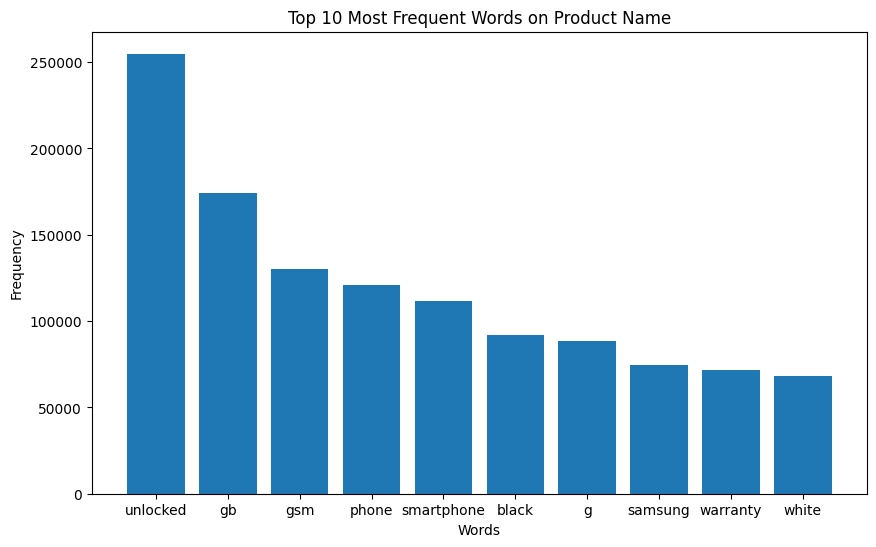

In [ ]:
# Create lists for words and frequencies
words = [word[0] for word in top_10_words]
frequencies = [word[1] for word in top_10_words]

# Plot the word frequencies
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.title('Top 10 Most Frequent Words on Product Name')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each review
df['Sentiment'] = df['Product Name'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


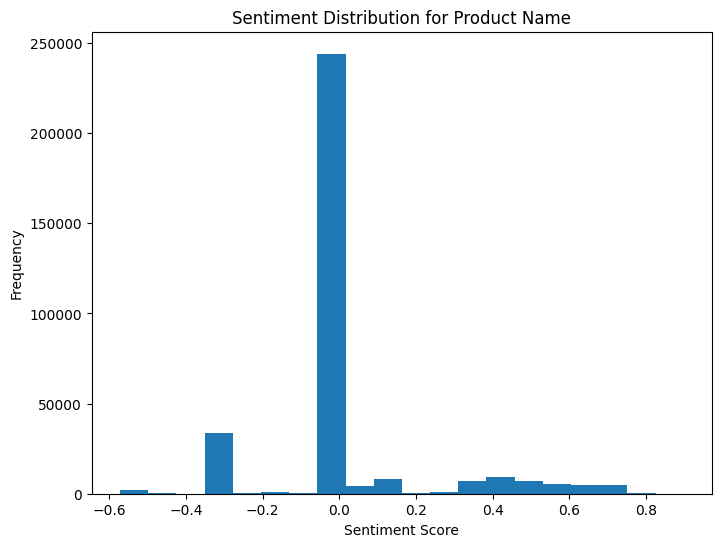

In [ ]:
# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
df['Sentiment'].plot(kind='hist', bins=20)
plt.title('Sentiment Distribution for Product Name')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

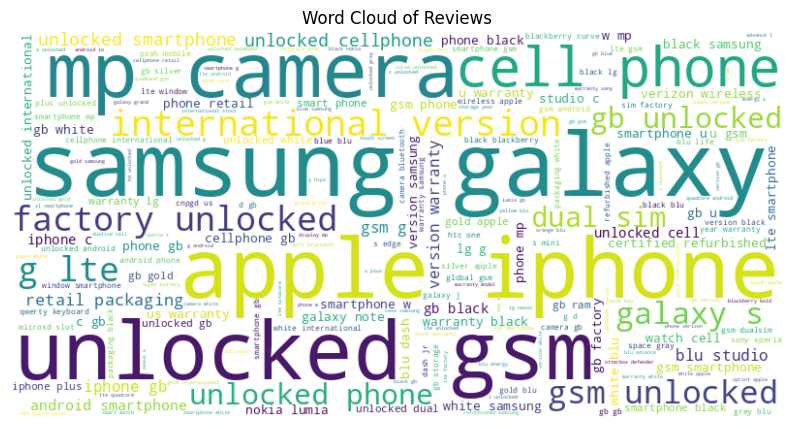

In [ ]:
# Concatenate all tokenized reviews into a single string
all_product_names = ' '.join(df['Cleaned_Name'])

# Generate the word cloudi
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_product_names)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df['Reviews']
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [ ]:
# Train the Random Forest Classifier
classifier = RandomForestClassifier()
classifier.fit(X_train_vectorized, y_train)

# Evaluate the model
y_pred = classifier.predict(X_test_vectorized)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.85      0.93      0.89     11570
           2       0.99      0.63      0.77      4039
           3       0.95      0.64      0.77      5228
           4       0.95      0.59      0.73     10025
           5       0.85      0.99      0.91     36005

    accuracy                           0.87     66867
   macro avg       0.92      0.76      0.81     66867
weighted avg       0.88      0.87      0.86     66867



In [10]:
from sklearn.metrics import accuracy_score
# Evaluate the model

classifier = RandomForestClassifier()
classifier.fit(X_train_vectorized, y_train)
y_pred = classifier.predict(X_test_vectorized)
report = classification_report(y_test, y_pred)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8706835957946372
